<a href="https://colab.research.google.com/github/Akshay4729/Regression-ML-Models/blob/main/Car_Dekho_Linear_Regression_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
df= pd.read_excel('/content/car data.xlsx')

In [ ]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


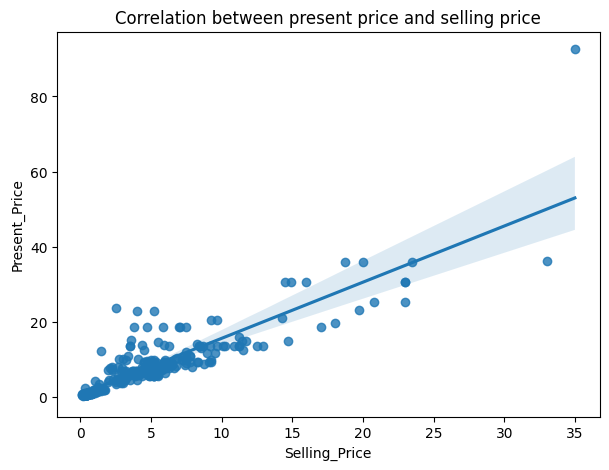

In [ ]:
fig=plt.figure(figsize=(7,5))
sns.regplot(x='Selling_Price',y='Present_Price',data=df)
plt.title('Correlation between present price and selling price')
plt.show()

In [ ]:
df.drop(columns=['Car_Name'],inplace=True)

In [ ]:
df['Transmission'] = df['Transmission'].replace({'Automatic': 0, 'Manual': 1})

In [ ]:
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,1,0
1,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,1,0
2,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,1,0
3,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,1,0
4,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,1,0


In [ ]:
df.corr()

<ipython-input-695-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.162510,0.089216
Transmission,0.000394,-0.367128,-0.348715,-0.162510,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.050316,1.000000


<ipython-input-696-37a7d319190f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


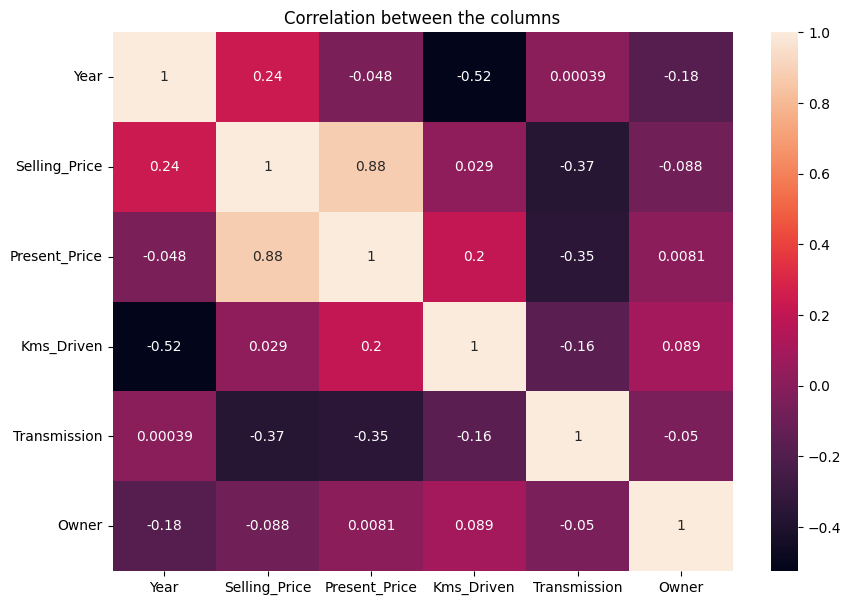

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
df['CNG']=np.where(df['Fuel_Type']=='CNG',1,0)
df['Diesel']=np.where(df['Fuel_Type']=='Diesel',1,0)
df['Electric']=np.where(df['Fuel_Type']=='Electric',1,0)
df['LPG']=np.where(df['Fuel_Type']=='LPG',1,0)
df['Petrol']=np.where(df['Fuel_Type']=='Petrol',1,0)

In [ ]:
df.drop(columns=['Fuel_Type'],inplace=True)

In [ ]:
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Electric,LPG,Petrol
0,maruti suzuki,2014,3.35,5.59,27000,Dealer,1,0,0,0,0,0,1
1,maruti suzuki,2013,4.75,9.54,43000,Dealer,1,0,0,1,0,0,0
2,maruti suzuki,2017,7.25,9.85,6900,Dealer,1,0,0,0,0,0,1
3,maruti suzuki,2011,2.85,4.15,5200,Dealer,1,0,0,0,0,0,1
4,maruti suzuki,2014,4.60,6.87,42450,Dealer,1,0,0,1,0,0,0


In [ ]:
df['Individual']=np.where(df['Seller_Type']=='Individual',1,0)
df['Dealer']=np.where(df['Seller_Type']=='Dealer',1,0)
df['Trustmark Dealer']=np.where(df['Seller_Type']=='Trustmark Dealer',1,0)

In [ ]:
df.drop(columns=['Seller_Type'],inplace=True)

In [ ]:
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,Petrol,Individual,Dealer,Trustmark Dealer
0,maruti suzuki,2014,3.35,5.59,27000,1,0,0,0,0,0,1,0,1,0
1,maruti suzuki,2013,4.75,9.54,43000,1,0,0,1,0,0,0,0,1,0
2,maruti suzuki,2017,7.25,9.85,6900,1,0,0,0,0,0,1,0,1,0
3,maruti suzuki,2011,2.85,4.15,5200,1,0,0,0,0,0,1,0,1,0
4,maruti suzuki,2014,4.60,6.87,42450,1,0,0,1,0,0,0,0,1,0


In [ ]:
df["company"].unique()

array(['maruti suzuki', 'toyota', 'other', 'bajaj', 'honda', 'yamaha',
       'tvs', 'hero', 'hyndai'], dtype=object)

In [ ]:
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,Petrol,Individual,Dealer,Trustmark Dealer
0,maruti suzuki,2014,3.35,5.59,27000,1,0,0,0,0,0,1,0,1,0
1,maruti suzuki,2013,4.75,9.54,43000,1,0,0,1,0,0,0,0,1,0
2,maruti suzuki,2017,7.25,9.85,6900,1,0,0,0,0,0,1,0,1,0
3,maruti suzuki,2011,2.85,4.15,5200,1,0,0,0,0,0,1,0,1,0
4,maruti suzuki,2014,4.60,6.87,42450,1,0,0,1,0,0,0,0,1,0


In [ ]:
df=pd.get_dummies(df,columns=['company'],drop_first=True)

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,...,Dealer,Trustmark Dealer,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha
0,2014,3.35,5.59,27000,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2011,2.85,4.15,5200,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   301 non-null    int64  
 1   Selling_Price          301 non-null    float64
 2   Present_Price          301 non-null    float64
 3   Kms_Driven             301 non-null    int64  
 4   Transmission           301 non-null    int64  
 5   Owner                  301 non-null    int64  
 6   CNG                    301 non-null    int64  
 7   Diesel                 301 non-null    int64  
 8   Electric               301 non-null    int64  
 9   LPG                    301 non-null    int64  
 10  Petrol                 301 non-null    int64  
 11  Individual             301 non-null    int64  
 12  Dealer                 301 non-null    int64  
 13  Trustmark Dealer       301 non-null    int64  
 14  company_hero           301 non-null    uint8  
 15  compan

In [ ]:
df.isnull().sum()

Year                     0
Selling_Price            0
Present_Price            0
Kms_Driven               0
Transmission             0
Owner                    0
CNG                      0
Diesel                   0
Electric                 0
LPG                      0
Petrol                   0
Individual               0
Dealer                   0
Trustmark Dealer         0
company_hero             0
company_honda            0
company_hyndai           0
company_maruti suzuki    0
company_other            0
company_toyota           0
company_tvs              0
company_yamaha           0
dtype: int64

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,...,Dealer,Trustmark Dealer,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha
0,2014,3.35,5.59,27000,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2011,2.85,4.15,5200,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
dependend_vairalble=df['Selling_Price']

In [ ]:
dependend_vairalble

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
df.drop(columns=['Selling_Price'],inplace=True)

In [ ]:
independend_vairalble=df

In [ ]:
independend_vairalble

,Year,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,Petrol,...,Dealer,Trustmark Dealer,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha
0,2014,5.59,27000,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,2013,9.54,43000,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2017,9.85,6900,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,2011,4.15,5200,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,2014,6.87,42450,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
297,2015,5.90,60000,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
298,2009,11.00,87934,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
299,2017,12.50,9000,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
x=independend_vairalble
y=dependend_vairalble

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train[:10]

,Year,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Electric,LPG,Petrol,...,Dealer,Trustmark Dealer,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha
74,2014,8.93,83000,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
239,2012,4.43,23709,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
64,2017,36.23,6000,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
294,2014,6.80,33019,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
286,2016,7.90,28569,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
295,2015,13.09,60076,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
90,2009,18.61,62000,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
173,2017,0.51,1300,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
73,2011,5.71,43000,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
20,2016,3.95,25000,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
x_train[:10]

array([[0.78571429, 0.09330299, 0.16516517, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.64285714, 0.04453836, 0.04646446, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.38914174, 0.01101101, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.78571429, 0.07022107, 0.0651031 , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.       

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-0.584561831660932

In [ ]:
regressor.coef_

array([ 5.28974693e+00,  3.93493705e+01, -2.93617247e+00, -1.59937668e+00,
       -3.24093745e+00, -9.23411040e-01,  1.43359433e+00, -5.77315973e-15,
        1.44328993e-15, -5.10183289e-01, -7.52442139e-01,  7.52442139e-01,
       -7.10542736e-15,  4.30417719e-01, -3.02071255e-01, -4.88025947e-01,
       -6.74120038e-01, -1.00558028e-01, -8.37970002e-01, -7.41873245e-01,
       -4.56753293e-01])

In [ ]:
y_pred_train=regressor.predict(x_train)

In [ ]:
y_train[:10]

74      4.90
239     2.00
64     33.00
294     3.75
286     5.65
295     8.55
90      3.80
173     0.40
73      2.65
20      2.85
Name: Selling_Price, dtype: float64

In [ ]:
y_pred_train[:10].round(0)

array([ 7.,  3., 21.,  4.,  6.,  9.,  7.,  3.,  2.,  4.])

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [ ]:
y_pred[:10].round(0)

array([ 8., -1.,  4.,  9., 15.,  5.,  4.,  2.,  6.,  5.])

In [ ]:
print("mean_absolute_error",(metrics.mean_absolute_error(y_pred_train,y_train)))
print("mean_squared_error",(metrics.mean_squared_error(y_pred_train,y_train)))

mean_absolute_error 1.1952620627942658
mean_squared_error 3.197386096789878


In [ ]:
r2_score(y_train,y_pred_train)

0.8759303670207781

In [ ]:
print("mean_absolute_error",(metrics.mean_absolute_error(y_pred,y_test)))
print("mean_squared_error",(metrics.mean_squared_error(y_pred,y_test)))

mean_absolute_error 1.0021249883262633
mean_squared_error 2.028544462181447


In [ ]:
r2_score(y_test,y_pred)

0.9197484315220531

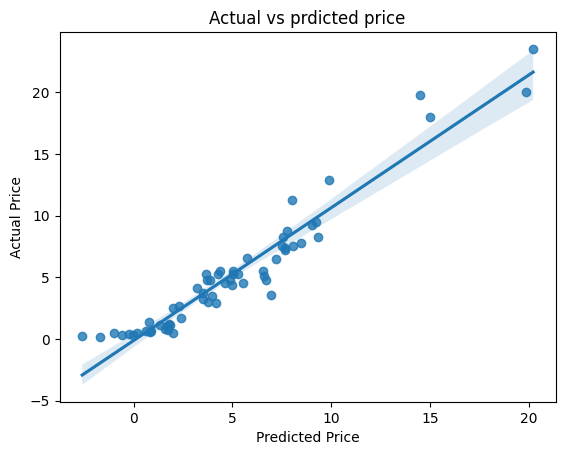

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs prdicted price")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [ ]:
ridge_regressor.best_score_

-5.755541015120036

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.320e+01, tolerance: 4.852e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.854e+01, tolerance: 5.412e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.418e+01, tolerance: 3.685e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_score_

-4.832951641461661

In [ ]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [ ]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_pred,y_test)
print(r2_score)

0.8999082133577332
